In [74]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [75]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [76]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [77]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [78]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with= engine)

In [79]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [80]:
# Save references to each table
station = base.classes.station
measurement = base.classes.measurement

In [81]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [82]:
# Find the most recent date in the data set.
(session.query(measurement.date).order_by(measurement.date.desc()).first())

('2017-08-23',)

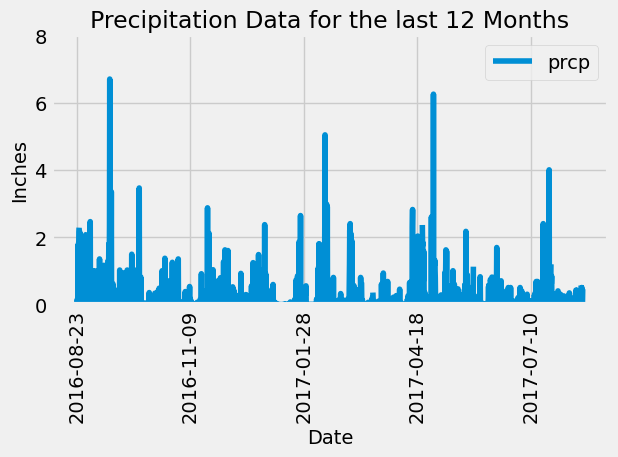

In [91]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_year= dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
last_date = dt.date(recent_year.year, recent_year.month, recent_year.day)

# Perform a query to retrieve the data and precipitation scores
query= session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_date).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
results_df =pd.DataFrame(query, columns=['date', 'precipitation'])

# Sort the dataframe by date
results_df.set_index(results_df['date'], inplace =True)

# Use Pandas Plotting with Matplotlib to plot the data
values_final_df.plot()
plt.ylim(0,8)
plt.xticks(rotation=90)
plt.title("Precipitation Data for the last 12 Months", size=17)
plt.ylabel("Inches", size=14)
plt.xlabel("Date", size=14)
plt.tight_layout()
plt.savefig("../Last_12 months_of_precipitation.png")
plt.show()

In [84]:
# Use Pandas to calculate the summary statistics for the precipitation data
results_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [85]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.id).count()

9

In [86]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_query =  session.query(measurement.station, func.count(measurement.station)).\
            group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).all()
station_query

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [87]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = 'USC00519281'
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == active_station).all()

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

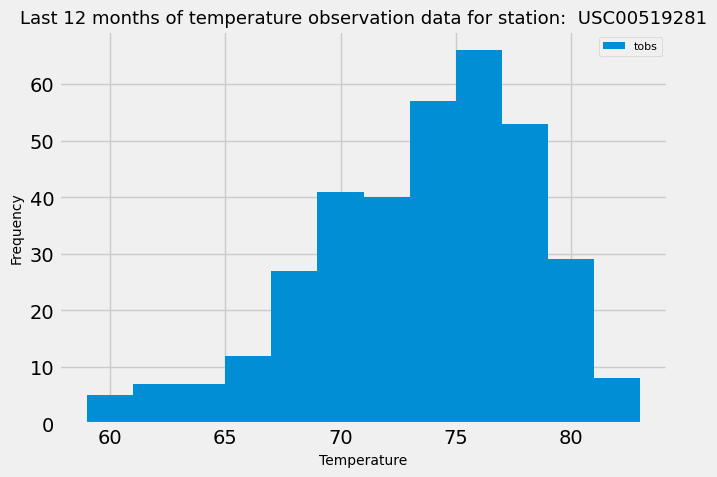

In [92]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_1 = session.query(measurement.tobs).filter(measurement.station=='USC00519281').filter(measurement.date>='2016-08-23').all()
results_1_df = pd.DataFrame(query_1, columns=['tobs'])

results_1_df.plot.hist( bins=12, figsize=(7,5))
plt.title("Last 12 months of temperature observation data for station:  " + active_station, fontsize=13)
plt.xlabel("Temperature", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.legend(bbox_to_anchor=(1,1), fontsize=8)
plt.savefig("../Last_12_months_of_temperature_for_station_USC00519281.png")
plt.tight_layout()
plt.show

# Close Session

In [89]:
# Close Session
session.close()